In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
data = pd.read_csv('/content/final_generated_data.csv')

# Define the features and target variable
features = ['Temperature', 'Humidity', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA',
            'QV2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'year', 'day', 'weekday', 'hour', 'month', 'Inflation']
target = 'Load'


In [132]:

# Initialize the scaler for features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_data

array([[0.30862126, 0.80084211, 0.34544254, ..., 0.56557943, 0.90300624,
        0.99455183],
       [0.24814725, 0.7046667 , 0.0552311 , ..., 0.58286217, 0.0705591 ,
        0.99286375],
       [0.28695336, 0.95700812, 0.13330878, ..., 0.07066197, 0.5207233 ,
        0.99744067],
       ...,
       [0.68230535, 0.68214733, 0.60161543, ..., 0.55611048, 0.55555775,
        0.99802298],
       [0.39667995, 0.67158868, 0.46392735, ..., 0.52751575, 0.99385528,
        0.        ],
       [0.60852278, 0.81076644, 0.74964264, ..., 0.54457186, 0.61848161,
        0.99485173]])

In [133]:

# Initialize the scaler for target variable (Load)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])
scaled_target

array([[0.74610131],
       [0.71835752],
       [0.17583076],
       ...,
       [0.68681019],
       [0.59526662],
       [0.77280826]])

In [134]:

# Split the data into features (X) and target variable (y)
X = scaled_data
y = scaled_target
X,y

(array([[0.30862126, 0.80084211, 0.34544254, ..., 0.56557943, 0.90300624,
         0.99455183],
        [0.24814725, 0.7046667 , 0.0552311 , ..., 0.58286217, 0.0705591 ,
         0.99286375],
        [0.28695336, 0.95700812, 0.13330878, ..., 0.07066197, 0.5207233 ,
         0.99744067],
        ...,
        [0.68230535, 0.68214733, 0.60161543, ..., 0.55611048, 0.55555775,
         0.99802298],
        [0.39667995, 0.67158868, 0.46392735, ..., 0.52751575, 0.99385528,
         0.        ],
        [0.60852278, 0.81076644, 0.74964264, ..., 0.54457186, 0.61848161,
         0.99485173]]),
 array([[0.74610131],
        [0.71835752],
        [0.17583076],
        ...,
        [0.68681019],
        [0.59526662],
        [0.77280826]]))

In [135]:

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [136]:
X_train, X_test, y_train, y_test

(array([[[0.30862126, 0.80084211, 0.34544254, ..., 0.56557943,
          0.90300624, 0.99455183]],
 
        [[0.24814725, 0.7046667 , 0.0552311 , ..., 0.58286217,
          0.0705591 , 0.99286375]],
 
        [[0.28695336, 0.95700812, 0.13330878, ..., 0.07066197,
          0.5207233 , 0.99744067]],
 
        ...,
 
        [[0.38640222, 0.86757635, 0.24625938, ..., 0.53165611,
          0.73462362, 0.        ]],
 
        [[0.23578813, 0.97845467, 0.13904114, ..., 0.76738801,
          0.68884047, 0.        ]],
 
        [[0.3265234 , 0.95852083, 0.14218767, ..., 0.44731694,
          0.77930246, 0.        ]]]),
 array([[[0.29038996, 0.968414  , 0.14379723, ..., 0.42098841,
          0.1041562 , 0.        ]],
 
        [[0.18249151, 0.7175644 , 0.00505091, ..., 0.45927141,
          0.90331098, 0.99867058]],
 
        [[0.23892258, 0.8796117 , 0.13001646, ..., 0.92299108,
          0.64534623, 0.99760404]],
 
        ...,
 
        [[0.68230535, 0.68214733, 0.60161543, ..., 0.55611048

In [137]:
# Build Bidirectional LSTM model
def build_bi_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Predict single value (Load)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [139]:
# Initialize early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
bi_lstm_model = build_bi_lstm_model((X_train.shape[1], X_train.shape[2]))
history = bi_lstm_model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/150
400/400 [==============================] - 16s 17ms/step - loss: 0.0305 - val_loss: 0.0139
Epoch 2/150
400/400 [==============================] - 4s 9ms/step - loss: 0.0137 - val_loss: 0.0108
Epoch 3/150
400/400 [==============================] - 4s 11ms/step - loss: 0.0111 - val_loss: 0.0088
Epoch 4/150
400/400 [==============================] - 4s 11ms/step - loss: 0.0099 - val_loss: 0.0082
Epoch 5/150
400/400 [==============================] - 4s 9ms/step - loss: 0.0088 - val_loss: 0.0072
Epoch 6/150
400/400 [==============================] - 4s 9ms/step - loss: 0.0081 - val_loss: 0.0063
Epoch 7/150
400/400 [==============================] - 5s 13ms/step - loss: 0.0075 - val_loss: 0.0062
Epoch 8/150
400/400 [==============================] - 3s 9ms/step - loss: 0.0071 - val_loss: 0.0059
Epoch 9/150
400/400 [==============================] - 3s 9ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 10/150
400/400 [==============================] - 4s 10ms/step - loss: 0.0063 - 

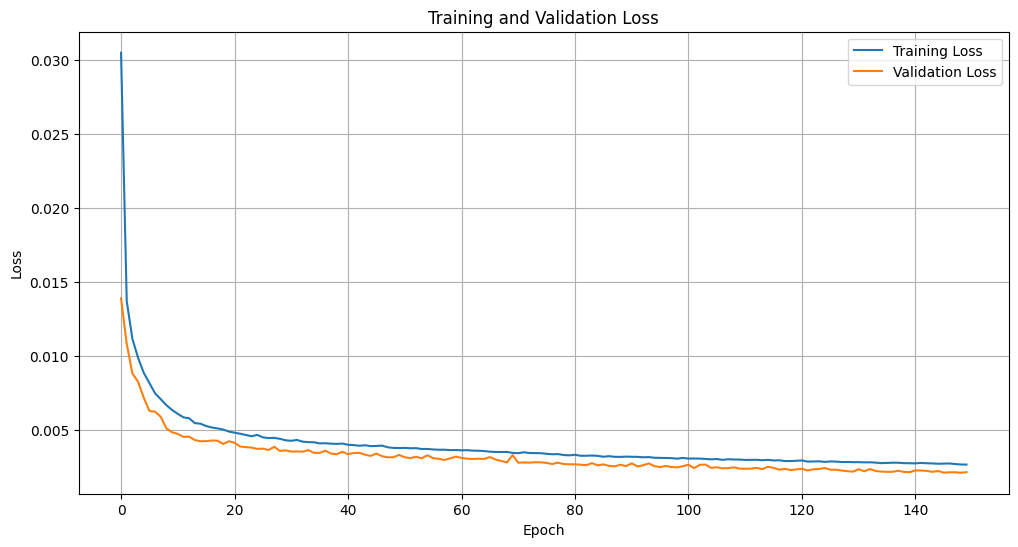

In [140]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [141]:
# Predict
y_pred_bi_lstm = bi_lstm_model.predict(X_test)
y_pred_bi_lstm
# Inverse transform predictions and actual values
y_pred_inv_bi_lstm = target_scaler.inverse_transform(y_pred_bi_lstm)
y_test_inv = target_scaler.inverse_transform(y_test)


250/250 [==============================] - 4s 4ms/step


In [142]:
y_test_inv,y_pred_inv_bi_lstm

(array([[28538.068],
        [57533.047],
        [39124.484],
        ...,
        [56719.125],
        [51406.29 ],
        [61710.12 ]]),
 array([[29670.564],
        [55929.555],
        [43390.977],
        ...,
        [56054.01 ],
        [57088.062],
        [61351.14 ]], dtype=float32))

In [143]:
# Calculate metrics
rmse_bi_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_bi_lstm))
r2_bi_lstm = r2_score(y_test_inv, y_pred_inv_bi_lstm)
print(f'Bidirectional LSTM Model - RMSE: {rmse_bi_lstm}, R²: {r2_bi_lstm}')

Bidirectional LSTM Model - RMSE: 2646.653492086731, R²: 0.96477760511315


In [144]:
# Predicting the next 24 hours
n_hours = 24
last_input = X_test[-1]  # Start with the last available data

# List to store future predictions
future_predictions = []

for _ in range(n_hours):
    last_input = np.reshape(last_input, (1, 1, X_train.shape[2]))  # Ensure correct shape
    next_pred = bi_lstm_model.predict(last_input)
    next_pred_inv = target_scaler.inverse_transform(next_pred)
    future_predictions.append(next_pred_inv[0][0])

    # Flatten last_input and next_pred to 1D arrays, then concatenate
    next_input = np.concatenate([last_input[0, 0, 1:], next_pred.flatten()])
    last_input = next_input.reshape(1, 1, X_train.shape[2])  # Reshape to 3D for the next prediction


1/1 [==============================] - 0s 21ms/step


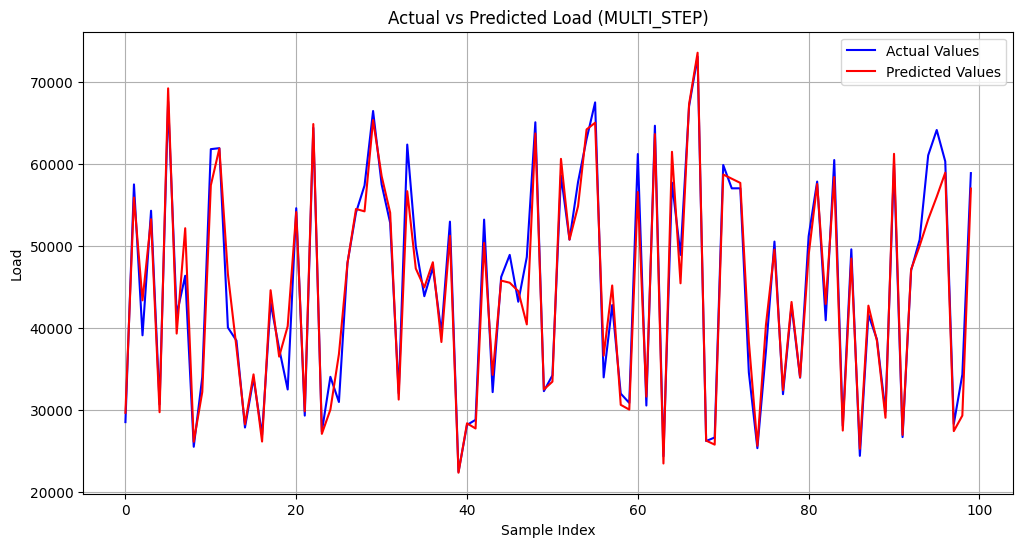

In [146]:
# Number of samples to show
num_samples_to_show = 100

# Plotting only a subset of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:num_samples_to_show], label='Actual Values', color='blue')
plt.plot(y_pred_inv_bi_lstm[:num_samples_to_show], label='Predicted Values', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Load')
plt.title('Actual vs Predicted Load (MULTI_STEP)')
plt.legend()
plt.grid(True)
plt.show()
